In [1]:
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("../data/processed/train_score.csv")
test = pd.read_csv("../data/processed/test_score.csv")

In [2]:
# Define 3 bands: Low / Medium / High Risk
train["risk_band"] = pd.qcut(train["score"], q=3, labels=["High Risk", "Medium Risk", "Low Risk"])
test["risk_band"] = pd.qcut(test["score"], q=3, labels=["High Risk", "Medium Risk", "Low Risk"])


In [3]:
print(train.groupby("risk_band")["default"].agg(['count','mean']))
print(test.groupby("risk_band")["default"].agg(['count','mean']))


              count      mean
risk_band                    
High Risk    275536  0.304018
Medium Risk  275536  0.169597
Low Risk     275534  0.079141
              count      mean
risk_band                    
High Risk    172966  0.359094
Medium Risk  172982  0.213779
Low Risk     172796  0.099562


C:\Users\VEDANT\AppData\Local\Temp\ipykernel_8040\3500084931.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(train.groupby("risk_band")["default"].agg(['count','mean']))
C:\Users\VEDANT\AppData\Local\Temp\ipykernel_8040\3500084931.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(test.groupby("risk_band")["default"].agg(['count','mean']))


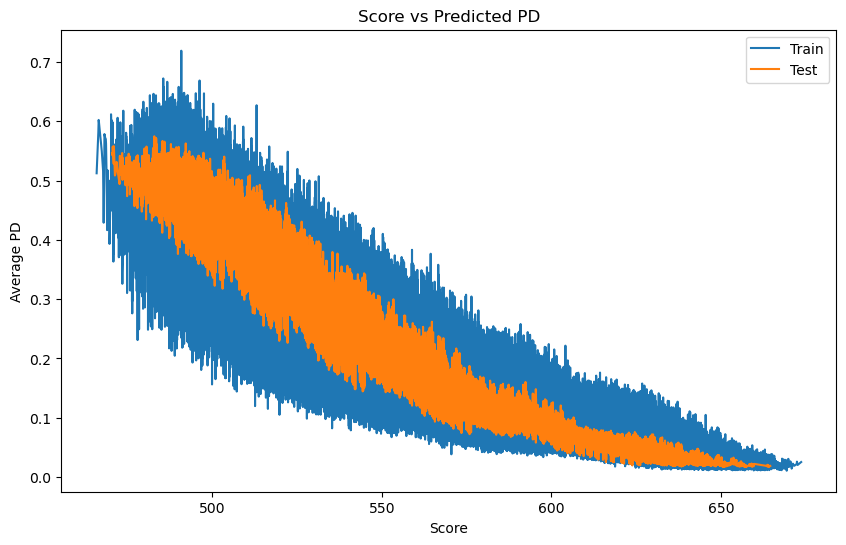

In [4]:
plt.figure(figsize=(10,6))
train.groupby("score")["PD"].mean().plot(label="Train")
test.groupby("score")["PD"].mean().plot(label="Test")
plt.xlabel("Score")
plt.ylabel("Average PD")
plt.title("Score vs Predicted PD")
plt.legend()
plt.show()


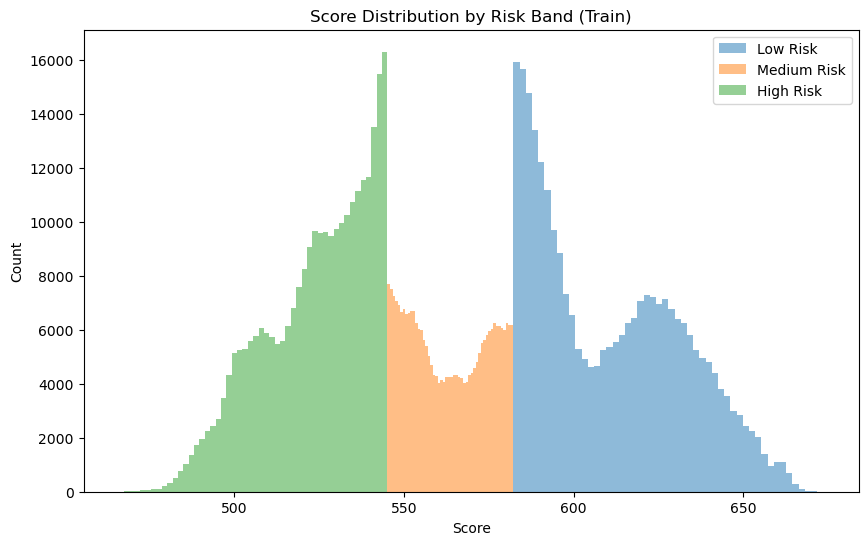

In [5]:
plt.figure(figsize=(10,6))
for band in ["Low Risk","Medium Risk","High Risk"]:
    subset = train[train["risk_band"]==band]
    plt.hist(subset["score"], bins=50, alpha=0.5, label=band)
plt.xlabel("Score")
plt.ylabel("Count")
plt.title("Score Distribution by Risk Band (Train)")
plt.legend()
plt.show()


In [6]:
train.to_csv("../data/processed/train_score_risk.csv", index=False)
test.to_csv("../data/processed/test_score_risk.csv", index=False)


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load final scored datasets with risk bands
train = pd.read_csv("../data/processed/train_score_risk.csv")
test = pd.read_csv("../data/processed/test_score_risk.csv")

# Ensure reports folder exists
import os
os.makedirs("../reports", exist_ok=True)

# -----------------------------
# 1️⃣ Score vs PD scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x="score", y="PD", data=train.sample(5000), alpha=0.5)
plt.xlabel("Score")
plt.ylabel("Predicted PD")
plt.title("Train Sample: Score vs Predicted PD")
plt.savefig("../reports/score_vs_PD_train.png", bbox_inches='tight')
plt.close()

# -----------------------------
# 2️⃣ Histogram of scores by risk band
plt.figure(figsize=(10,6))
sns.histplot(data=train, x="score", hue="risk_band", bins=50, multiple="stack")
plt.title("Train Score Distribution by Risk Band")
plt.xlabel("Score")
plt.ylabel("Count")
plt.savefig("../reports/score_histogram_train.png", bbox_inches='tight')
plt.close()

# -----------------------------
# 3️⃣ Default rate per risk band
risk_pd = train.groupby("risk_band")["default"].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x="risk_band", y="default", data=risk_pd, order=["Low Risk","Medium Risk","High Risk"])
plt.ylabel("Average Default Rate")
plt.title("Average PD by Risk Band (Train)")
plt.savefig("../reports/avg_PD_by_risk_band.png", bbox_inches='tight')
plt.close()

# -----------------------------
# 4️⃣ Test Score Distribution histogram
plt.figure(figsize=(10,6))
sns.histplot(data=test, x="score", hue="risk_band", bins=50, multiple="stack")
plt.title("Test Score Distribution by Risk Band")
plt.xlabel("Score")
plt.ylabel("Count")
plt.savefig("../reports/score_histogram_test.png", bbox_inches='tight')
plt.close()
